In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading Climate data

In [4]:

file_path_gf = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/climate data.csv"
df_climate_gafsa= pd.read_csv(file_path_gf, skiprows=18, na_values=['-999.0'])


file_path_k = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/climate data.csv"
df_climate_Kairouan= pd.read_csv(file_path_k, skiprows=18, na_values=['-999.0'])


file_path_j = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/climate data.csv"
df_climate_jendouba= pd.read_csv(file_path_j, skiprows=18, na_values=['-999.0'])


file_path_t = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/climate data.csv"
df_climate_tunis= pd.read_csv(file_path_t, skiprows=18, na_values=['-999.0'])


file_path_g = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/climate data.csv"
df_climate_gabes= pd.read_csv(file_path_g, skiprows=18, na_values=['-999.0'])


# Merging the different climate data files

In [5]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_climate_gafsa["Region"] = "Gafsa"
df_climate_gabes["Region"] = "Gabes"
df_climate_Kairouan["Region"] = "Kairouan"
df_climate_tunis["Region"] = "Tunis"
df_climate_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
climate_data_combined = pd.concat([df_climate_gafsa, df_climate_gabes, df_climate_Kairouan, df_climate_tunis, df_climate_jendouba], ignore_index=True)

# Display the first few rows
climate_data_combined

# Save to a CSV file if needed


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,WS2M,Region
0,1990,1,1,2.19,2.91,0.46,312.5,43.7,NaN,NaN,NaN,NaN,2.54,Gafsa
1,1990,1,2,2.60,3.15,0.55,317.2,50.8,NaN,NaN,NaN,NaN,1.94,Gafsa
2,1990,1,3,2.72,3.34,0.57,303.4,53.5,NaN,NaN,NaN,NaN,1.67,Gafsa
3,1990,1,4,1.52,3.32,0.31,315.0,31.3,NaN,NaN,NaN,NaN,1.51,Gafsa
4,1990,1,5,1.68,3.28,0.34,315.3,33.9,NaN,NaN,NaN,NaN,5.03,Gafsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62675,2024,4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,Jendouba
62676,2024,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.74,Jendouba
62677,2024,4,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,Jendouba
62678,2024,4,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.49,Jendouba


# Deleting Nan values

In [6]:
# Remove rows with NaN values
climate_data_combined_cleaned = climate_data_combined.dropna()

# Display the number of rows before and after cleaning
print(f"Rows before cleaning: {climate_data_combined.shape[0]}")
print(f"Rows after cleaning: {climate_data_combined_cleaned.shape[0]}")

# Save the cleaned dataset (optional)
climate_data_combined_cleaned.to_csv("climate_data_cleaned.csv", index=False)


Rows before cleaning: 62680
Rows after cleaning: 40557


In [7]:

missing_values = climate_data_combined_cleaned.isnull().sum()
print(missing_values)

YEAR                   0
MO                     0
DY                     0
ALLSKY_SFC_SW_DWN      0
CLRSKY_SFC_SW_DWN      0
ALLSKY_KT              0
ALLSKY_SFC_LW_DWN      0
ALLSKY_SFC_PAR_TOT     0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_UVA         0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UV_INDEX    0
WS2M                   0
Region                 0
dtype: int64


In [8]:
climate_data_combined_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40557 entries, 4018 to 62562
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 40557 non-null  int64  
 1   MO                   40557 non-null  int64  
 2   DY                   40557 non-null  int64  
 3   ALLSKY_SFC_SW_DWN    40557 non-null  float64
 4   CLRSKY_SFC_SW_DWN    40557 non-null  float64
 5   ALLSKY_KT            40557 non-null  float64
 6   ALLSKY_SFC_LW_DWN    40557 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   40557 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   40557 non-null  float64
 9   ALLSKY_SFC_UVA       40557 non-null  float64
 10  ALLSKY_SFC_UVB       40557 non-null  float64
 11  ALLSKY_SFC_UV_INDEX  40557 non-null  float64
 12  WS2M                 40557 non-null  float64
 13  Region               40557 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 4.6+ MB


# Different Climate data variables distribution

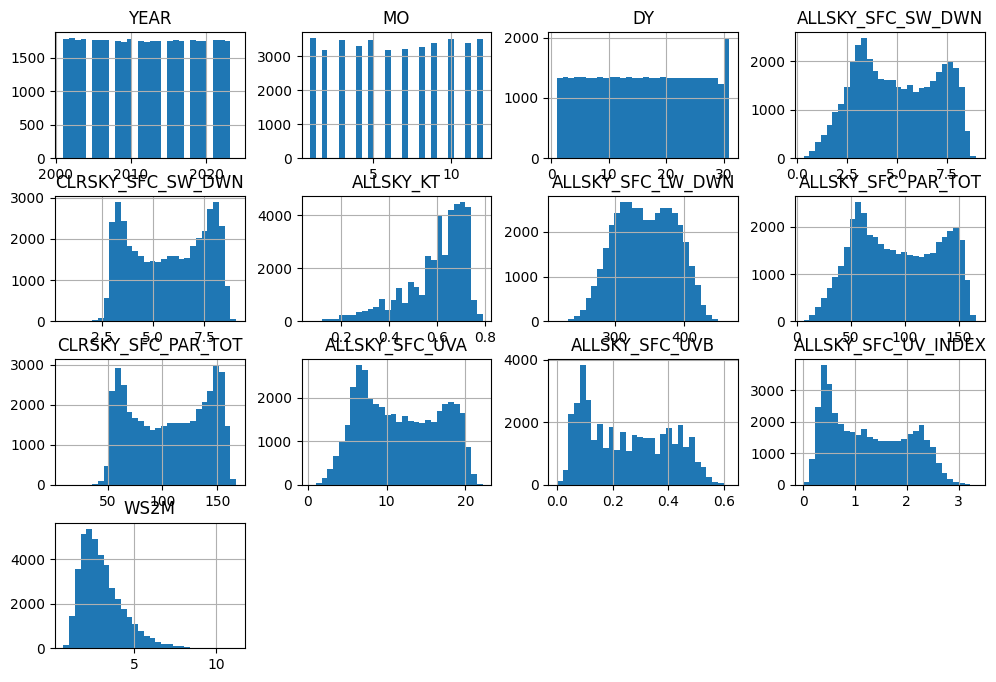

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all numerical columns
climate_data_combined_cleaned.hist(figsize=(12, 8), bins=30)
plt.show()


# Boxplot searching for outliers

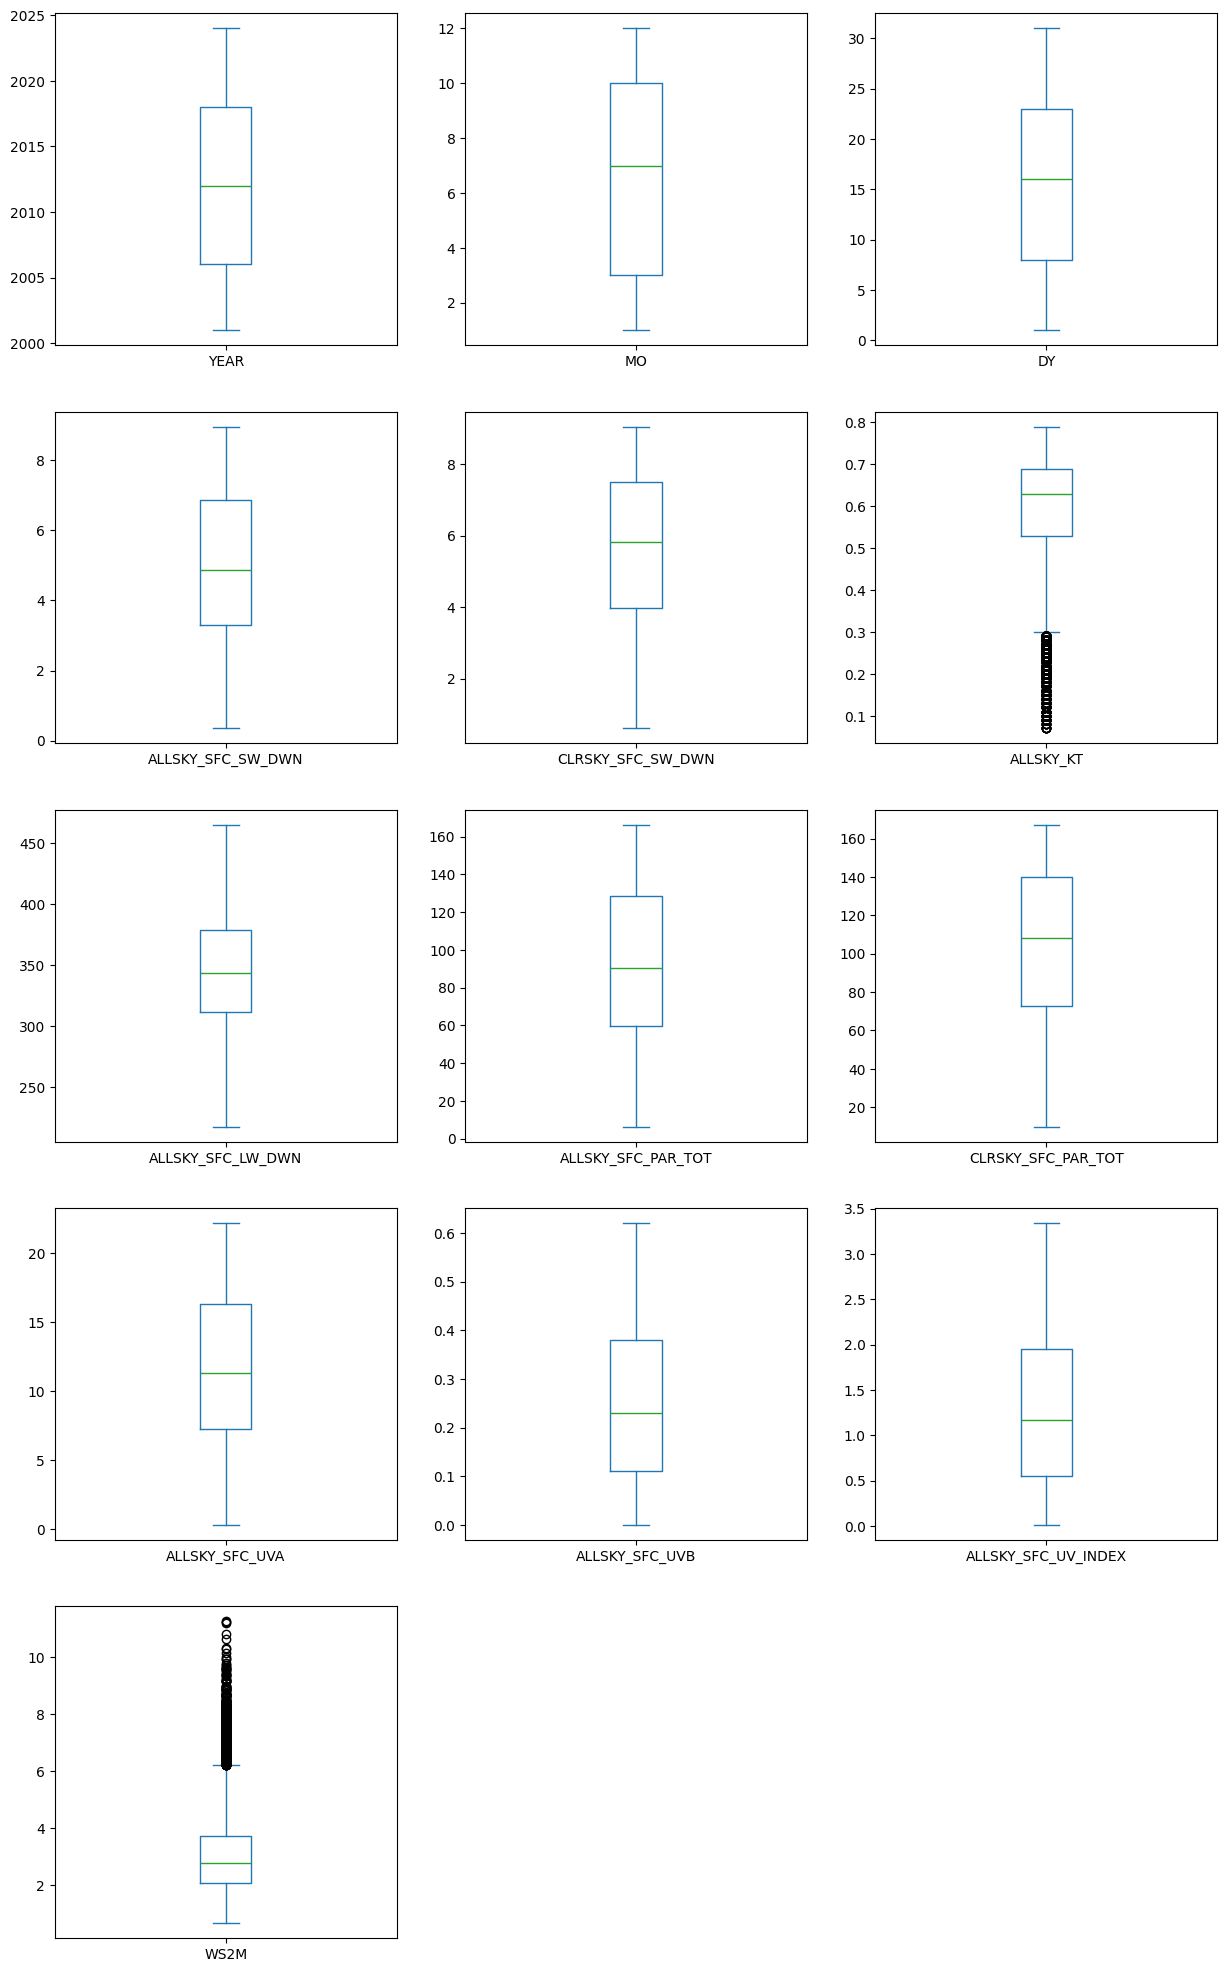

In [10]:
import numpy as np

num_columns = len(climate_data_combined_cleaned.select_dtypes(include=['number']).columns)
rows = int(np.ceil(num_columns / 3))  # Adjust rows dynamically

climate_data_combined_cleaned.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, 5 * rows))
plt.show()


# 1️⃣ ALLSKY_KT (Clearness Index) – Many Outliers at the Lower End

📊 Why are there so many outliers?

The outliers appear at the lower end (~0.1-0.3).
This suggests many data points where solar radiation was much lower than expected.

**Possible causes:**

-Cloud cover or storms drastically reducing sunlight.

-Seasonal variations, particularly during winter months when sunlight is weaker.
Geographical differences, if data comes from multiple locations.

-Sensor errors or extreme weather events.

# 2️⃣ WS2M (Wind Speed at 2 Meters) – Many High-End Outliers
📊 Why so many outliers?

Outliers occur at the higher end (>6 m/s), meaning many unusually strong wind events.

**Possible causes:**
-Storms, cyclones, or extreme weather events increasing wind speed.

-Geographical variation, the dataset includes coastal and inland regions, meaning wind speeds can differ drastically.

# ✅ Conclusion

Since these variations are realistic and make sense, they should not be removed.

<ipython-input-11-c0fa34488c5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=climate_data_combined_cleaned, palette="viridis")


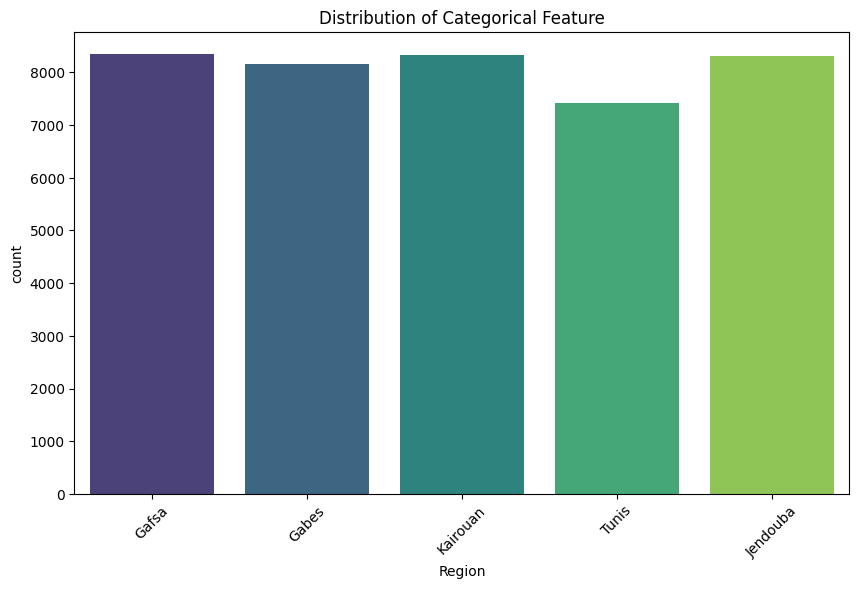

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Region", data=climate_data_combined_cleaned, palette="viridis")
plt.title("Distribution of Categorical Feature")
plt.xticks(rotation=45)
plt.show()


# Correlation between different climate data variables + One hot encoding

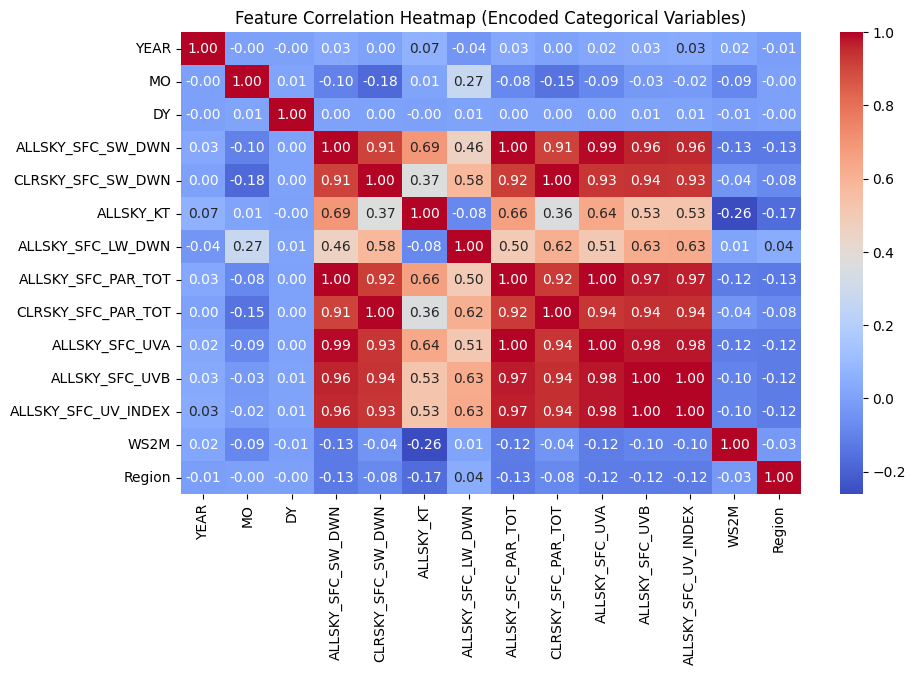

In [12]:
from sklearn.preprocessing import LabelEncoder

df_climate_data = climate_data_combined_cleaned.copy()  # Work on a copy
label_encoders = {}

for col in df_climate_data.select_dtypes(include=['object']).columns:  # Encode only object (string) columns
    label_encoders[col] = LabelEncoder()
    df_climate_data[col] = label_encoders[col].fit_transform(df_climate_data[col])

# Now plot the heatmap with encoded values
plt.figure(figsize=(10, 6))
sns.heatmap(df_climate_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Encoded Categorical Variables)")
plt.show()


# Strongly Correlated Variables (High Positive Correlation 🔴)

*  **ALLSKY_SFC_SW_DWN & CLRSKY_SFC_SW_DWN (0.91):**

-These two variables both measure downward shortwave solar radiation in different conditions.

-This suggests that clear sky conditions significantly impact solar energy reaching the surface.

* **ALLSKY_SFC_PAR_TOT & CLRSKY_SFC_PAR_TOT (0.94):**

-These two represent Photosynthetically Active Radiation (PAR) under all-sky vs. clear-sky conditions.

-The near-perfect correlation suggests PAR variations are largely dependent on cloud cover.



* **ALLSKY_SFC_UVA, ALLSKY_SFC_UVB, and ALLSKY_SFC_UV_INDEX (~0.96-0.99):**


-These ultraviolet-related variables show extremely high correlations.

-This means that if one of them increases, the others will almost always increase too.

*Practical implication:

-If we're analyzing UV exposure for crops, measuring just one of these variables might be sufficient.

# Standarization

# Dropping highly correlated variables

In [45]:
drop_cols = ["CLRSKY_SFC_SW_DWN", "CLRSKY_SFC_PAR_TOT", "ALLSKY_SFC_UVA", "ALLSKY_SFC_UVB"]
df_climate_data = df_climate_data.drop(columns=drop_cols)

print(df_climate_data.head())

      YEAR  MO  DY  ALLSKY_SFC_SW_DWN  ALLSKY_KT  ALLSKY_SFC_LW_DWN  \
4018  2001   1   1               3.56       0.74             243.04   
4019  2001   1   2               3.29       0.69             261.65   
4020  2001   1   3               3.60       0.75             254.45   
4021  2001   1   4               3.06       0.63             277.16   
4022  2001   1   5               3.48       0.72             283.01   

      ALLSKY_SFC_PAR_TOT  ALLSKY_SFC_UV_INDEX  WS2M  Region  
4018               62.17                 0.46  2.73       1  
4019               57.98                 0.47  3.66       1  
4020               63.33                 0.54  1.70       1  
4021               54.91                 0.43  2.55       1  
4022               62.14                 0.46  2.27       1  


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = df_climate_data.select_dtypes(include=['number']).columns  # Select numerical features
climate_data_scaled = df_climate_data.copy()
climate_data_scaled[numeric_columns] = scaler.fit_transform(climate_data_scaled[numeric_columns])

# Display first few rows after scaling
print(climate_data_scaled.head())


          YEAR        MO        DY  ALLSKY_SFC_SW_DWN  ALLSKY_KT  \
4018 -1.652432 -1.585021 -1.672064          -0.712223   1.116835   
4019 -1.652432 -1.585021 -1.558375          -0.845638   0.731535   
4020 -1.652432 -1.585021 -1.444686          -0.692457   1.193895   
4021 -1.652432 -1.585021 -1.330996          -0.959289   0.269175   
4022 -1.652432 -1.585021 -1.217307          -0.751753   0.962715   

      ALLSKY_SFC_LW_DWN  ALLSKY_SFC_PAR_TOT  ALLSKY_SFC_UV_INDEX      WS2M  \
4018          -2.411907           -0.807513            -1.076084 -0.231925   
4019          -1.968917           -0.916544            -1.062790  0.472299   
4020          -2.140305           -0.777328            -0.969733 -1.011871   
4021          -1.599718           -0.996430            -1.115966 -0.368226   
4022          -1.460465           -0.808294            -1.076084 -0.580250   

       Region  
4018 -0.69074  
4019 -0.69074  
4020 -0.69074  
4021 -0.69074  
4022 -0.69074  


# Loading Climate data 2 files

In [50]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/climate data 2.csv"
df_climate2_gabes= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/climate data 2.csv"
df_climate2_gafsa= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/climate data 2.csv"
df_climate2_Kairouan= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/climate data 2.csv"
df_climate2_tunis= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/climate data 2.csv"
df_climate2_jendouba= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])

# Merging climate data 2 files

In [52]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_climate2_gafsa["Region"] = "Gafsa"
df_climate2_gabes["Region"] = "Gabes"
df_climate2_Kairouan["Region"] = "Kairouan"
df_climate2_tunis["Region"] = "Tunis"
df_climate2_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
climate_data2_combined = pd.concat([df_climate2_gafsa, df_climate2_gabes, df_climate2_Kairouan, df_climate2_tunis, df_climate2_jendouba], ignore_index=True)


# Save to a CSV file if needed
#climate_data2_combined.to_csv("climate_data2_combined.csv", index=False)

climate_data2_combined

climate_data2_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62680 entries, 0 to 62679
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         62680 non-null  int64  
 1   MO           62680 non-null  int64  
 2   DY           62680 non-null  int64  
 3   T2M          62673 non-null  float64
 4   T2MDEW       62673 non-null  float64
 5   T2MWET       62673 non-null  float64
 6   TS           62673 non-null  float64
 7   T2M_RANGE    62673 non-null  float64
 8   T2M_MAX      62673 non-null  float64
 9   T2M_MIN      62673 non-null  float64
 10  QV2M         62673 non-null  float64
 11  RH2M         62673 non-null  float64
 12  PRECTOTCORR  62673 non-null  float64
 13  PS           62673 non-null  float64
 14  WS10M        62673 non-null  float64
 15  WS10M_RANGE  62673 non-null  float64
 16  WD10M        62673 non-null  float64
 17  WS50M        62673 non-null  float64
 18  WS50M_RANGE  62673 non-null  float64
 19  WD50

In [53]:
# Remove rows with NaN values
climate_data2_combined_cleaned = climate_data2_combined.dropna()

# Display the number of rows before and after cleaning
print(f"Rows before cleaning: {climate_data2_combined.shape[0]}")
print(f"Rows after cleaning: {climate_data2_combined_cleaned.shape[0]}")

# Save the cleaned dataset (optional)
climate_data2_combined_cleaned.to_csv("climate_data_cleaned.csv", index=False)

climate_data2_combined_cleaned.info()


Rows before cleaning: 62680
Rows after cleaning: 62673
<class 'pandas.core.frame.DataFrame'>
Index: 62673 entries, 0 to 62678
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         62673 non-null  int64  
 1   MO           62673 non-null  int64  
 2   DY           62673 non-null  int64  
 3   T2M          62673 non-null  float64
 4   T2MDEW       62673 non-null  float64
 5   T2MWET       62673 non-null  float64
 6   TS           62673 non-null  float64
 7   T2M_RANGE    62673 non-null  float64
 8   T2M_MAX      62673 non-null  float64
 9   T2M_MIN      62673 non-null  float64
 10  QV2M         62673 non-null  float64
 11  RH2M         62673 non-null  float64
 12  PRECTOTCORR  62673 non-null  float64
 13  PS           62673 non-null  float64
 14  WS10M        62673 non-null  float64
 15  WS10M_RANGE  62673 non-null  float64
 16  WD10M        62673 non-null  float64
 17  WS50M        62673 non-null  float64
 

In [54]:

missing_values = climate_data2_combined_cleaned.isnull().sum()
print(missing_values)

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS10M_RANGE    0
WD10M          0
WS50M          0
WS50M_RANGE    0
WD50M          0
Region         0
dtype: int64


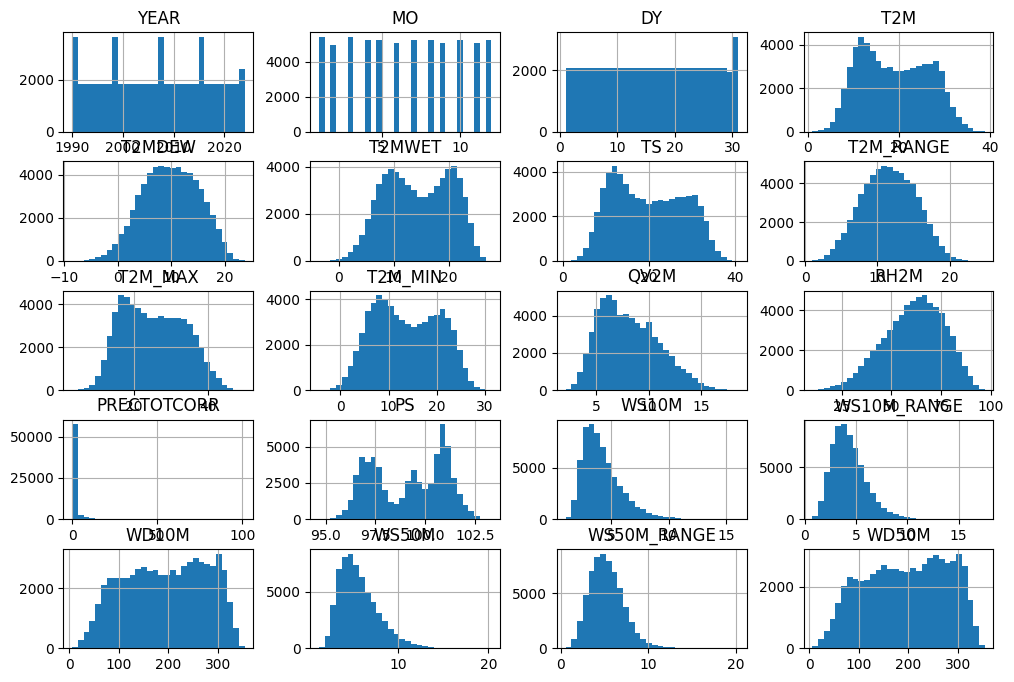

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all numerical columns
climate_data2_combined_cleaned.hist(figsize=(12, 8), bins=30)
plt.show()


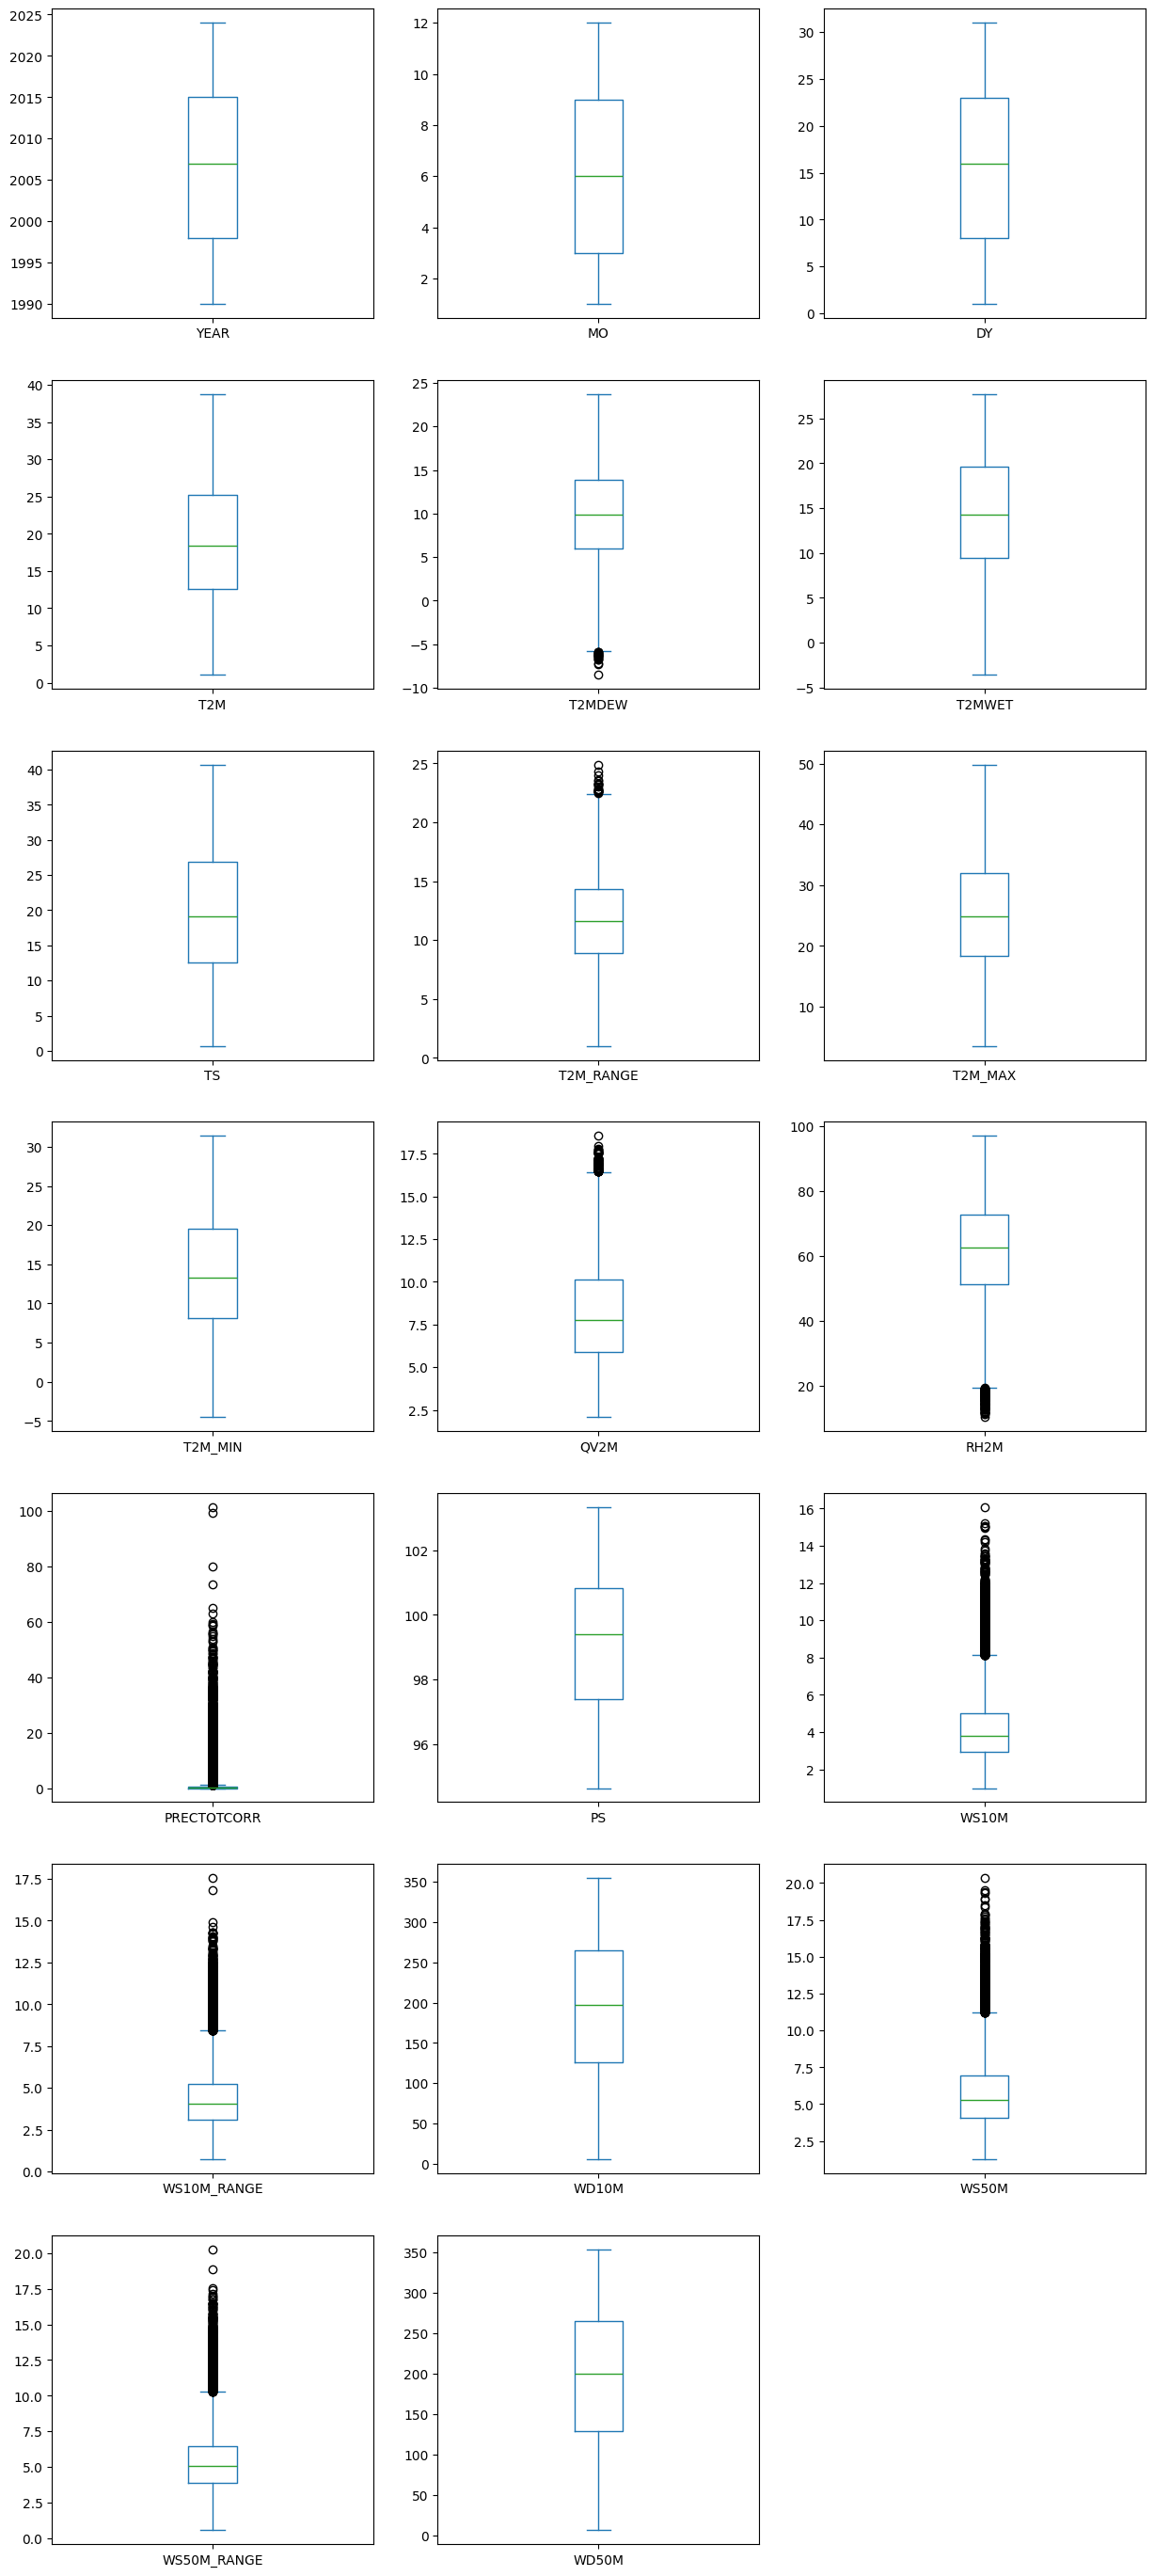

In [56]:
import numpy as np

num_columns = len(climate_data2_combined_cleaned.select_dtypes(include=['number']).columns)
rows = int(np.ceil(num_columns / 3))  # Adjust rows dynamically

climate_data2_combined_cleaned.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, 5 * rows))
plt.show()


#  Variables with Many Outliers
🔴 **T2M_RANGE (Temperature Range):**

-This variable measures the difference between daily maximum and minimum temperatures.

-The outliers appear at the upper end, meaning some days have an unusually high temperature range.

**Possible Causes:**


*   Extreme weather conditions: Large temperature swings occur in deserts or continental climates.
*   Seasonal transitions: Spring and autumn can bring high fluctuations.
*   Geographical effects: Mountainous regions experience bigger differences between day and night temperatures.


🔴 **WS10M, WS50M, and WS10M_RANGE (Wind Speed at Different Heights)**

-These represent wind speed at 10m and 50m above ground, with WS10M_RANGE showing fluctuations.

-Many high outliers suggest the presence of unusually strong winds.

**Possible Causes:**
*   Storms, hurricanes, or extreme weather events.
*  Geographical location – coastal or mountainous areas tend to have stronger winds.
*  Measurement issues – sudden spikes may be errors or sensor malfunctions.



**🔴 PRECTOTCORR (Total Precipitation)**

-This variable has a massive number of outliers at the upper end.
Suggests the presence of extreme rainfall events.

**Possible Causes:**


* Heavy storms, hurricanes, or monsoons in certain regions.
* Climatic variations – deserts vs. tropical areas have very different precipitation patterns.

* Seasonality – wet vs. dry seasons may cause extreme variations.





**🔴 RH2M (Relative Humidity at 2m)**

-The outliers appear at the low end, meaning some locations have extremely dry air.

**Possible Causes:**



* Desert or arid regions naturally have low humidity.
* Seasonal dryness – winter can cause extreme dryness in some regions.
* Measurement issues – some weather stations might not record humidity properly.

✅Conclusion:

-These variation make sense based on climate conditions and geographic location, so we won't remove them.

-We might consider using robust models: models like Random Forest, XGBoost, or robust regression work better in our case than simple linear models.

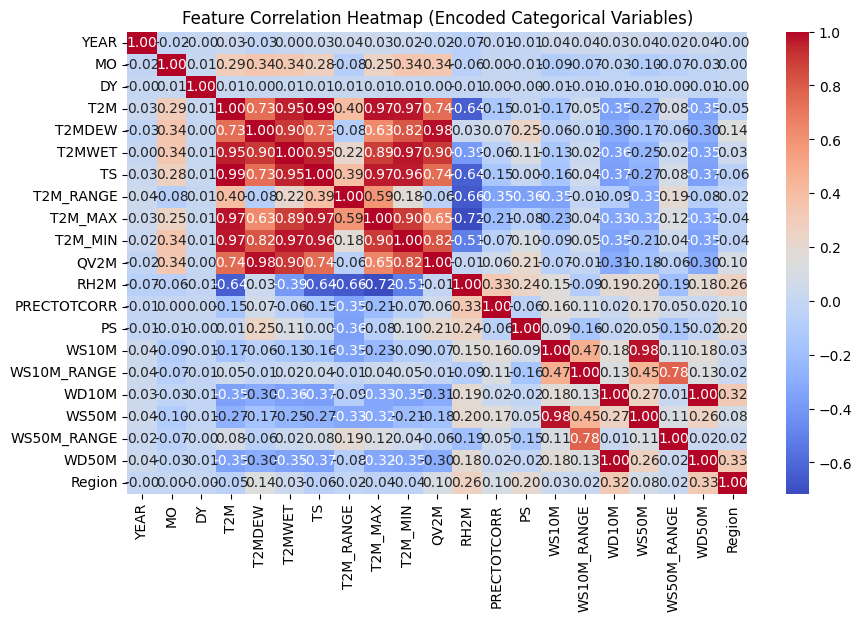

In [57]:
from sklearn.preprocessing import LabelEncoder

df_climate_data2 = climate_data2_combined_cleaned.copy()  # Work on a copy
label_encoders = {}

for col in df_climate_data2.select_dtypes(include=['object']).columns:  # Encode only object (string) columns
    label_encoders[col] = LabelEncoder()
    df_climate_data2[col] = label_encoders[col].fit_transform(df_climate_data2[col])

# Now plot the heatmap with encoded values
plt.figure(figsize=(10, 6))
sns.heatmap(df_climate_data2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Encoded Categorical Variables)")
plt.show()


#  Strongly Correlated Variables (High Positive Correlation 🔴)

**✅ Temperature-Related Correlations:**



* T2M (Temperature at 2m) & TS (Surface Temperature) (~0.99)
→ Almost a perfect correlation between air temperature (T2M) and surface temperature (TS).

**→ Implication:** Measuring either of these might be sufficient for certain analyses.

* T2M & T2M_MAX (~0.97) & T2M_MIN (~0.97)
→ T2M_MAX (daily max temp) and T2M_MIN (daily min temp) are highly correlated with average temperature (T2M).

**→ Implication:** These variables don’t provide much extra information, so one could be removed in feature selection.

* T2M_RANGE & T2M_MAX (~0.89) & T2M_MIN (~0.80)
→ Temperature range (difference between max and min) has a strong correlation with max and min temps.

**→ Implication:** High-temperature days also tend to have high daily temperature variation.

* T2MWET (Wet-bulb temperature) & T2M (~0.95)
→ Wet-bulb temperature (which factors in humidity) is almost directly tied to air temperature.

**→ Implication:** Humidity effects are mostly captured in T2MWET, making it redundant.

**✅ Humidity & Atmospheric Moisture Correlations**

* T2MDEW (Dew Point) & T2MWET (~0.90) & T2M (~0.73)
→ Dew point temperature (T2MDEW) is highly correlated with wet-bulb temperature (T2MWET) and also positively related to air temperature (T2M).

**→ Implication:** Warmer air holds more moisture, explaining the link.

* QV2M (Specific Humidity) & RH2M (Relative Humidity) (~0.66)
→ These are different ways to measure humidity, with QV2M measuring absolute moisture and RH2M measuring relative moisture.

**→ Implication:** Both contribute similar information, but QV2M may be more useful in climate models.

**✅ Wind Speed & Wind Range Correlations**

* WS10M & WS50M (~0.98)
→ Wind speeds at 10m and 50m are very strongly correlated.

**→ Implication:** Higher-altitude wind speeds can be predicted using 10m wind speeds, meaning one of them could be removed for feature selection.

* WS10M_RANGE & WS50M_RANGE (~0.78)
→ Wind fluctuation at different heights is moderately correlated.

**→ Implication:** Sudden wind variations at 10m often reflect similar fluctuations at 50m.

# Dropping redundant variables

In [59]:
drop_cols = ["TS", "T2M_MAX", "T2M_MIN", "T2MDEW", "RH2M", "WS50M", "WS50M_RANGE"]
df_climate_data2 = df_climate_data2.drop(columns=drop_cols)

print(df_climate_data2.head())  # Check the cleaned dataset


   YEAR  MO  DY    T2M  T2MWET  T2M_RANGE  QV2M  PRECTOTCORR     PS  WS10M  \
0  1990   1   1  10.88    8.10       9.66  5.80         0.32  96.63   3.76   
1  1990   1   2   9.08    6.31      11.12  5.07         0.01  97.00   3.02   
2  1990   1   3   8.90    6.43      11.29  5.25         0.00  96.86   2.72   
3  1990   1   4   7.83    5.55       6.68  5.00         0.08  96.49   2.25   
4  1990   1   5   9.83    7.79       8.52  5.92         2.81  96.64   6.84   

   WS10M_RANGE   WD10M   WD50M  Region  
0         4.13  346.75  346.94       1  
1         1.77  312.94  313.12       1  
2         2.26  184.75  185.56       1  
3         3.63  141.38  141.69       1  
4         5.16   55.69   56.19       1  


# Standarization

In [60]:

scaler = StandardScaler()
numeric_columns = df_climate_data2.select_dtypes(include=['number']).columns  # Select numerical features
climate_data_scaled = df_climate_data2.copy()
climate_data_scaled[numeric_columns] = scaler.fit_transform(climate_data_scaled[numeric_columns])

# Display first few rows after scaling
print(climate_data_scaled.head())
climate_data_scaled

       YEAR        MO        DY       T2M    T2MWET  T2M_RANGE      QV2M  \
0 -1.681711 -1.586886 -1.673589 -1.095584 -1.068723  -0.532001 -0.843391   
1 -1.681711 -1.586886 -1.559923 -1.340083 -1.373354  -0.134426 -1.106040   
2 -1.681711 -1.586886 -1.446258 -1.364533 -1.352932  -0.088133 -1.041277   
3 -1.681711 -1.586886 -1.332593 -1.509874 -1.502695  -1.343489 -1.131225   
4 -1.681711 -1.586886 -1.218927 -1.238208 -1.121480  -0.842436 -0.800216   

   PRECTOTCORR        PS     WS10M  WS10M_RANGE     WD10M     WD50M    Region  
0    -0.215277 -1.400036 -0.242014    -0.100411  1.861944  1.859280 -0.707073  
1    -0.306613 -1.195861 -0.680084    -1.510186  1.448989  1.444523 -0.707073  
2    -0.309560 -1.273116 -0.857680    -1.217478 -0.116721 -0.119829 -0.707073  
3    -0.285989 -1.477291 -1.135914    -0.399092 -0.646441 -0.657836 -0.707073  
4     0.518361 -1.394517  1.581305     0.514872 -1.693057 -1.706379 -0.707073  


,YEAR,MO,DY,T2M,T2MWET,T2M_RANGE,QV2M,PRECTOTCORR,PS,WS10M,WS10M_RANGE,WD10M,WD50M,Region
0,-1.681711,-1.586886,-1.673589,-1.095584,-1.068723,-0.532001,-0.843391,-0.215277,-1.400036,-0.242014,-0.100411,1.861944,1.859280,-0.707073
1,-1.681711,-1.586886,-1.559923,-1.340083,-1.373354,-0.134426,-1.106040,-0.306613,-1.195861,-0.680084,-1.510186,1.448989,1.444523,-0.707073
2,-1.681711,-1.586886,-1.446258,-1.364533,-1.352932,-0.088133,-1.041277,-0.309560,-1.273116,-0.857680,-1.217478,-0.116721,-0.119829,-0.707073
3,-1.681711,-1.586886,-1.332593,-1.509874,-1.502695,-1.343489,-1.131225,-0.285989,-1.477291,-1.135914,-0.399092,-0.646441,-0.657836,-0.707073
4,-1.681711,-1.586886,-1.218927,-1.238208,-1.121480,-0.842436,-0.800216,0.518361,-1.394517,1.581305,0.514872,-1.693057,-1.706379,-0.707073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62674,1.749843,-0.718964,0.713384,-0.772301,-0.925767,-0.039117,-0.954927,-0.309560,-1.135160,-0.697844,0.281901,1.116891,1.108866,0.000045
62675,1.749843,-0.718964,0.827050,-0.806259,-0.825358,-0.199781,-0.757041,0.135337,-1.107569,-0.419610,0.042956,0.872611,0.840660,0.000045
62676,1.749843,-0.718964,0.940715,-1.101017,-1.101058,-1.003099,-0.886566,0.320956,-1.035832,0.740684,2.318906,1.451188,1.443787,0.000045
62677,1.749843,-0.718964,1.054381,-0.747851,-1.084040,2.340884,-1.195988,-0.309560,-1.168270,-0.526168,-1.528107,0.086398,0.233609,0.000045


























# Importing soil data

In [22]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/soil data.csv"
df_soil_gabes= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/soil data.csv"
df_soil_gafsa= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/soil data.csv"
df_soil_tunis= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/soil data.csv"
df_soil_jendouba= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/soil data.csv"
df_soil_Kairouan= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])


In [23]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_soil_gafsa["Region"] = "Gafsa"
df_soil_gabes["Region"] = "Gabes"
df_soil_Kairouan["Region"] = "Kairouan"
df_soil_tunis["Region"] = "Tunis"
df_soil_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
soil_data_combined = pd.concat([df_soil_gafsa, df_soil_gabes, df_soil_Kairouan, df_soil_tunis, df_soil_jendouba], ignore_index=True)


# Save to a CSV file if needed
#climate_data2_combined.to_csv("climate_data2_combined.csv", index=False)

soil_data_combined.info()

print(soil_data_combined.head())
soil_data_combined.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      450 non-null    int64  
 1   DOY       450 non-null    int64  
 2   GWETTOP   450 non-null    float64
 3   GWETROOT  450 non-null    float64
 4   GWETPROF  450 non-null    float64
 5   Region    450 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 21.2+ KB
   YEAR  DOY  GWETTOP  GWETROOT  GWETPROF Region
0  2021    1     0.33      0.34      0.34  Gafsa
1  2021    2     0.33      0.34      0.34  Gafsa
2  2021    3     0.33      0.34      0.34  Gafsa
3  2021    4     0.33      0.34      0.34  Gafsa
4  2021    5     0.32      0.34      0.34  Gafsa


(450, 6)

In [24]:

missing_values = soil_data_combined.isnull().sum()
print(missing_values)

YEAR        0
DOY         0
GWETTOP     0
GWETROOT    0
GWETPROF    0
Region      0
dtype: int64


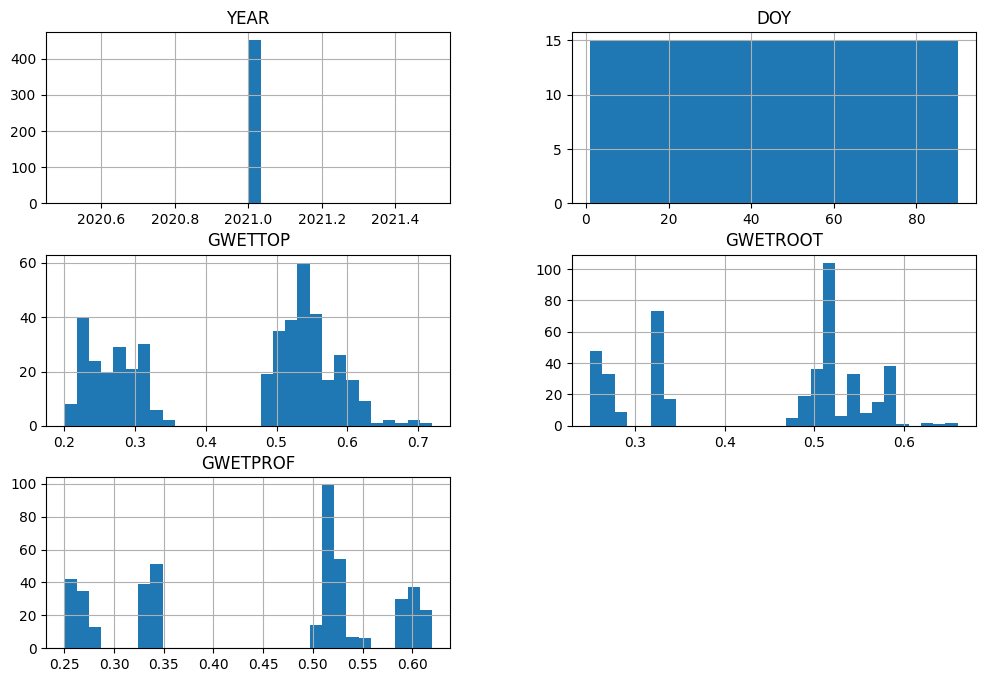

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all numerical columns
soil_data_combined.hist(figsize=(12, 8), bins=30)
plt.show()


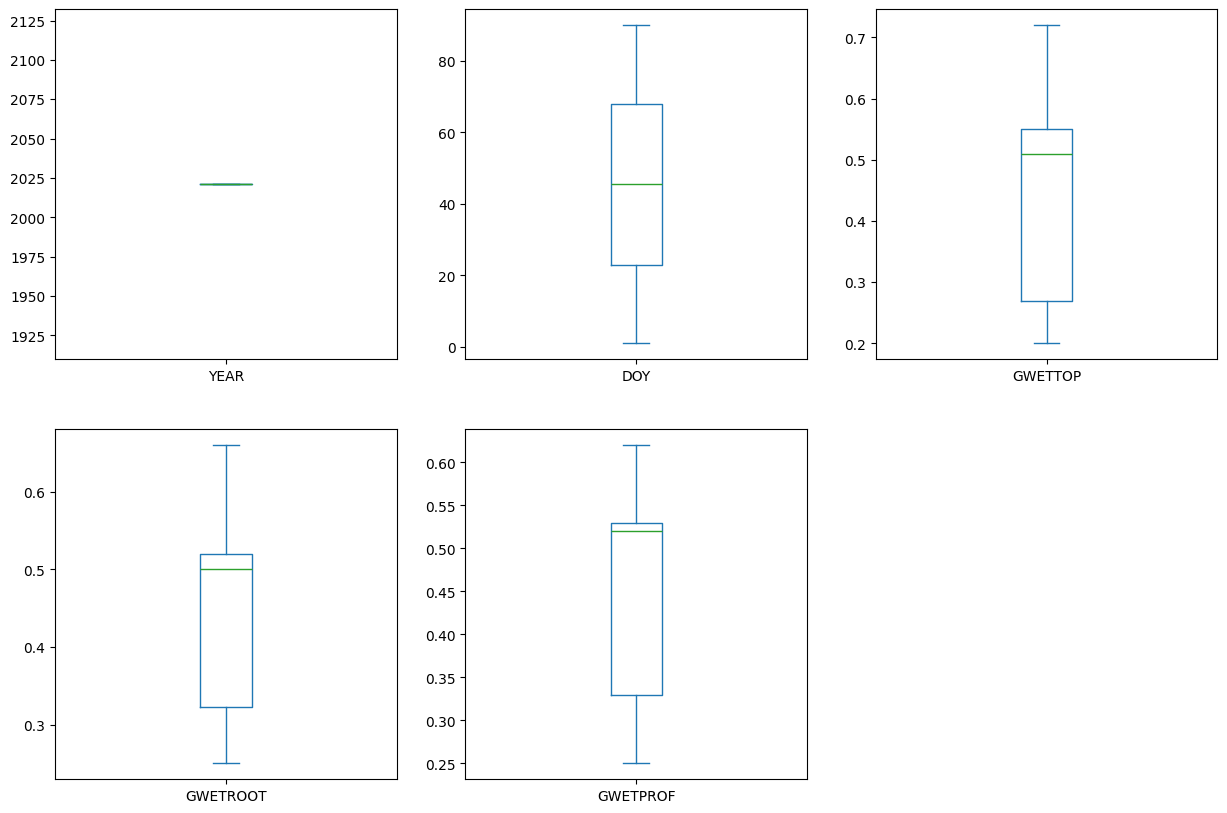

In [26]:
import numpy as np

num_columns = len(soil_data_combined.select_dtypes(include=['number']).columns)
rows = int(np.ceil(num_columns / 3))  # Adjust rows dynamically

soil_data_combined.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, 5 * rows))
plt.show()


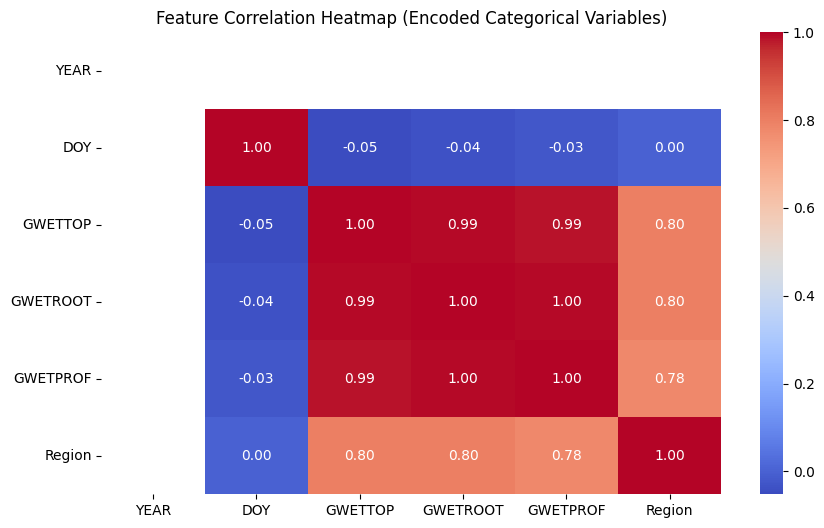

In [27]:
from sklearn.preprocessing import LabelEncoder

df_soil_data = soil_data_combined.copy()  # Work on a copy
label_encoders = {}

for col in df_soil_data.select_dtypes(include=['object']).columns:  # Encode only object (string) columns
    label_encoders[col] = LabelEncoder()
    df_soil_data[col] = label_encoders[col].fit_transform(df_soil_data[col])

# Now plot the heatmap with encoded values
plt.figure(figsize=(10, 6))
sns.heatmap(df_soil_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Encoded Categorical Variables)")
plt.show()


# Strongly Correlated Variables (Red Areas - High Positive Correlation 🔴)

**✅ Soil Moisture Variables (GWETTOP, GWETROOT, GWETPROF)**

* GWETTOP & GWETROOT (~0.99)
* GWETTOP & GWETPROF (~0.99)
* GWETROOT & GWETPROF (~1.00)

These three variables measure soil moisture at different depths:

GWETTOP → Topsoil moisture

GWETROOT → Root zone moisture

GWETPROF → Total soil moisture profile

Their extremely high correlation suggests that changes in topsoil moisture directly impact deeper layers.
Implication: Since all three are nearly identical in terms of correlation, we might want to remove one or two of them during feature selection to avoid redundancy in modeling.

**✅ Region & Soil Moisture (~0.78 - 0.80)**

* Region is highly correlated (~0.80) with GWETTOP, GWETROOT, and GWETPROF.

Different regions have significantly different soil moisture levels.
This suggests that location plays a major role in soil moisture distribution.

Certain regions may receive more rainfall or have better water retention than others.

✅ Implication:

If predicting soil moisture, including "Region" as a feature is valuable.
We might also group regions with similar soil moisture behavior.


# Standarization

In [28]:

scaler = StandardScaler()
numeric_columns = df_soil_data.select_dtypes(include=['number']).columns  # Select numerical features
climate_data_scaled = df_soil_data.copy()
climate_data_scaled[numeric_columns] = scaler.fit_transform(climate_data_scaled[numeric_columns])

# Display first few rows after scaling
print(climate_data_scaled.head())

   YEAR       DOY   GWETTOP  GWETROOT  GWETPROF    Region
0   0.0 -1.712912 -0.735039 -0.814528 -0.859607 -0.707107
1   0.0 -1.674419 -0.735039 -0.814528 -0.859607 -0.707107
2   0.0 -1.635927 -0.735039 -0.814528 -0.859607 -0.707107
3   0.0 -1.597434 -0.735039 -0.814528 -0.859607 -0.707107
4   0.0 -1.558942 -0.804984 -0.814528 -0.859607 -0.707107


,YEAR,DOY,GWETTOP,GWETROOT,GWETPROF,Region
0,0.0,-1.712912,-0.735039,-0.814528,-0.859607,-0.707107
1,0.0,-1.674419,-0.735039,-0.814528,-0.859607,-0.707107
2,0.0,-1.635927,-0.735039,-0.814528,-0.859607,-0.707107
3,0.0,-1.597434,-0.735039,-0.814528,-0.859607,-0.707107
4,0.0,-1.558942,-0.804984,-0.814528,-0.859607,-0.707107
...,...,...,...,...,...,...
445,0.0,1.558942,1.153463,1.260057,1.343617,0.000000
446,0.0,1.597434,1.083518,1.260057,1.343617,0.000000
447,0.0,1.635927,1.083518,1.177073,1.264930,0.000000
448,0.0,1.674419,1.013574,1.094090,1.264930,0.000000


# Importing Fournisseurs.csv data

In [68]:
import pandas as pd

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/fournisseurs.csv"

# Load CSV file
df_fournisseurs = pd.read_csv(file_path, encoding="utf-8", dtype=str)

# Replace \n and \r in all text fields correctly
df_fournisseurs = df_fournisseurs.map(lambda x: x.replace("\r", " ").replace("\n", " ") if isinstance(x, str) else x)
df_fournisseurs.rename(columns={"SociÃ©tÃ©": "Société"}, inplace=True)

# Display first rows to verify
df_fournisseurs.head()


,Société,Adresse,Produits
0,AGRI EXPERT,166 Avenue de Gabès – Z.I. Mghira III – 2082 F...,ALGA-PLEX FOLIASTIM B Mo liquide FOLIASTIM MN/...
1,Atlas Agricole S.A.,"Zone industrielle, Djebel El Oust, 1111 Zaghouan",PHYLGREEN TRADEBOR TRADECORP AZ TRADECITRUS UL...
2,FERTI AGRO,"Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...",FORCE CYT FORCE SIL FORCEX ECO
3,Sociéte NABHANA,57 Rue HediChaker 3100 Kairouan Tunisie,GLOPPDER ALGAPOWER LIGNOMIX CRIPTHUM
4,LIEN AGRICOLE,"Zone industrielle, 7030 Mateur",FULLVIGOR BIFIDUS


In [88]:
df_fournisseurs.shape

(28, 11)

In [89]:
df_fournisseurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Société                           28 non-null     object 
 1   Adresse                           28 non-null     object 
 2   Produits                          28 non-null     object 
 3   Biostimulants & Growth Enhancers  28 non-null     int64  
 4   Fertilizers & Soil Conditioners   28 non-null     int64  
 5   General Agriculture & Other       28 non-null     int64  
 6   Microbial & Organic Solutions     28 non-null     int64  
 7   Other                             28 non-null     int64  
 8   Pesticides & Fungicides           28 non-null     int64  
 9   Latitude                          27 non-null     float64
 10  Longitude                         27 non-null     float64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ KB


In [69]:
# Define product categories based on function
categories = {
    "Fertilizers & Soil Conditioners": [
        "ALGA-PLEX", "FOLIASTIM B Mo liquide", "FOLIASTIM MN/ZN", "FOLIASTIM mix TE liquide",
        "TRADECORP AZ", "TRADECITRUS", "ULTRAFERRO", "FORCE CYT", "FORCE SIL FORCEX ECO",
        "HUMILIG 25 PLUS", "HUMILIG 8-8", "HUMILIG 11-5", "NUTRIJISA ECOCAL", "GROBEL NPK 4-3-3+1MgO",
        "MOLEX", "TARSSAN MIX", "VITANICA RZ BIO", "DEFENDER CALCIO", "DEFENDER MZ", "GREENCROP",
        "Nutriplusorganic4-3-3", "FERTIGRAIN START", "FERTIGRAIN FOLIAR", "Zn-Mn", "IDAI CA SOIL",
        "IDAI K PLUS", "PANORAMIX WHEAT", "SANBIO EPSOMIT", "SANBIO TERRA", "SANBIO PLANTA", "SANBIO SANA"
    ],

    "Pesticides & Fungicides": [
        "BLACKJAK", "PERFECTOSE", "STIMUL NOSSUM SP", "CUPRO ACTIV", "FUSVICUR", "MICOPRON",
        "JISAQUEL FE S-6", "BOTAMISOL PRO 80", "BOMBARDIER", "BOMBARDIER SUGAR", "BORKO", "CAOS XT",
        "RHYZO", "ESPARTAN", "FERROACTIV H48", "FLOCROP B"
    ],

    "Biostimulants & Growth Enhancers": [
        "PHYLGREEN", "TRADEBOR", "ALGADUL", "ASCOFILLUM", "ALGALIV", "FRUTALIV", "GOLDEN FER",
        "VIGORAL MOL", "VITALEM FORTE", "REZIST", "VICI ACTIVE", "VITAMINA MIX", "ACM AMINO 12",
        "ACM AMINO 45 SOLID", "ACM CITRUS", "ACM COBRE", "ACM FUL EXTRA", "ACM HIERRO", "ACM HUMIC",
        "ACM MAR 20", "ACM POTASIO GEL", "ACM SEAFORCE", "TECAMIN MAX", "IDAI ALGAFER", "IDAI BROTAVERD",
        "AGRI M40", "AGRIFUL", "AGRIPHYT CONTACT", "CONTROLPHYT Cu", "VENI BIOSULFUR", "GREEN FORGE", "HOLD plus"
    ],

    "Microbial & Organic Solutions": [
        "ALGAPOWER", "LIGNOMIX", "CRIPTHUM", "BIOCAL", "ORGAFLOW", "FULLVIGOR", "BIFIDUS",
        "EARTH ALIVE SOIL ACTIVATOR", "ACA 27 ORGANIC", "MIX DRIP COMPBI", "FERTICROP ORGANIC PLUS",
        "AGRI-OSMOZ"
    ],

    "General Agriculture & Other": [
        "ECKLOMAR", "BLACKFORT", "SUPER FIFTY", "TERIOS LIQUIDO", "ICC", "ICI", "POWHUMUS WSG 85",
        "BESTCURE", "BIORADICANTE", "DEFENDER B", "FITOMAAT", "N-BALANCER", "Mainstay Calcio", "TURBO"
    ]
}


In [70]:
# Ensure all product names are uppercase for uniform matching
df_fournisseurs["Produits"] = df_fournisseurs["Produits"].str.upper()

# Function to classify products into categories
def classify_products(product_list):
    assigned_categories = []

    for category, product_keywords in categories.items():
        if any(prod in product_list for prod in product_keywords):
            assigned_categories.append(category)

    return ', '.join(assigned_categories) if assigned_categories else "Other"

# Apply the function to classify suppliers
df_fournisseurs["Category"] = df_fournisseurs["Produits"].apply(classify_products)

# Display updated dataset
print(df_fournisseurs[["Société ", "Category"]].head())


              Société                                            Category
0          AGRI EXPERT                    Fertilizers & Soil Conditioners
1  Atlas Agricole S.A.  Fertilizers & Soil Conditioners, Biostimulants...
2           FERTI AGRO                    Fertilizers & Soil Conditioners
3     Sociéte NABHANA                       Microbial & Organic Solutions
4        LIEN AGRICOLE                      Microbial & Organic Solutions


In [71]:
print("Available columns:", df_fournisseurs.columns.tolist())


Available columns: ['Société ', 'Adresse', 'Produits', 'Category']


In [72]:
# One-hot encode the categories
df_categories = df_fournisseurs["Category"].str.get_dummies(sep=", ")

# Merge with main dataframe
df_fournisseurs = pd.concat([df_fournisseurs.drop(columns=["Category"]), df_categories], axis=1)

print(df_fournisseurs.head())  # Now, each supplier has binary category columns


              Société                                             Adresse  \
0          AGRI EXPERT  166 Avenue de Gabès – Z.I. Mghira III – 2082 F...   
1  Atlas Agricole S.A.  Zone industrielle, Djebel El Oust, 1111 Zaghouan    
2           FERTI AGRO  Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...   
3     Sociéte NABHANA            57 Rue HediChaker 3100 Kairouan Tunisie    
4        LIEN AGRICOLE                    Zone industrielle, 7030 Mateur    

                                            Produits  \
0  ALGA-PLEX FOLIASTIM B MO LIQUIDE FOLIASTIM MN/...   
1  PHYLGREEN TRADEBOR TRADECORP AZ TRADECITRUS UL...   
2                     FORCE CYT FORCE SIL FORCEX ECO   
3               GLOPPDER ALGAPOWER LIGNOMIX CRIPTHUM   
4                                  FULLVIGOR BIFIDUS   

   Biostimulants & Growth Enhancers  Fertilizers & Soil Conditioners  \
0                                 0                                1   
1                                 1                     

In [73]:
df_fournisseurs

,Société,Adresse,Produits,Biostimulants & Growth Enhancers,Fertilizers & Soil Conditioners,General Agriculture & Other,Microbial & Organic Solutions,Other,Pesticides & Fungicides
0,AGRI EXPERT,166 Avenue de Gabès – Z.I. Mghira III – 2082 F...,ALGA-PLEX FOLIASTIM B MO LIQUIDE FOLIASTIM MN/...,0,1,0,0,0,0
1,Atlas Agricole S.A.,"Zone industrielle, Djebel El Oust, 1111 Zaghouan",PHYLGREEN TRADEBOR TRADECORP AZ TRADECITRUS UL...,1,1,0,0,0,0
2,FERTI AGRO,"Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...",FORCE CYT FORCE SIL FORCEX ECO,0,1,0,0,0,0
3,Sociéte NABHANA,57 Rue HediChaker 3100 Kairouan Tunisie,GLOPPDER ALGAPOWER LIGNOMIX CRIPTHUM,0,0,0,1,0,0
4,LIEN AGRICOLE,"Zone industrielle, 7030 Mateur",FULLVIGOR BIFIDUS,0,0,0,1,0,0
5,ociété Saidi de Collecte des Céréales (SSCC),Immeuble Golden Towers Bur. 3-5; 3ème étage – ...,FARINA DI BASALTO,0,0,0,0,1,0
6,Agriprotec,"Km 11, Route de Mornag, 2090 Mornag",BASFOLIAR SIZE SLALGA 600 VITANICA RZ BIO,0,1,0,0,0,0
7,SANABEL AGRO,"Z.I. Route Menzel Bourguiba,7030 Mateur",ECKLOMAR,0,0,1,0,0,0
8,BH FARMS SERVICE AGRICOLE,"56, Avenue de la Liberté, 1001 Bab El Bhar, Tu...",BLACKFORT SUPER FIFTY,0,0,1,0,0,0
9,BIO FERTILIZER UNIT,"Km 4, Route Soliman, 8030 Grombalia",TERIOS LIQUIDO,0,0,1,0,0,0


In [81]:
!pip install opencage


In [77]:
# Fix special characters & remove excessive spaces
df_fournisseurs["Adresse"] = df_fournisseurs["Adresse"].str.replace("–", "-")  # Normalize dashes
df_fournisseurs["Adresse"] = df_fournisseurs["Adresse"].str.replace(r"\s+", " ", regex=True)  # Remove extra spaces
df_fournisseurs["Adresse"] = df_fournisseurs["Adresse"].apply(lambda x: x.strip())  # Trim whitespace

# Ensure addresses contain "Tunisia" for better geocoding
df_fournisseurs["Adresse"] = df_fournisseurs["Adresse"] + ", Tunisia"

# Print first few cleaned addresses
print(df_fournisseurs["Adresse"].head())


0    166 Avenue de Gabès - Z.I. Mghira III - 2082 F...
1    Zone industrielle, Djebel El Oust, 1111 Zaghou...
2    Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...
3     57 Rue HediChaker 3100 Kairouan Tunisie, Tunisia
4              Zone industrielle, 7030 Mateur, Tunisia
Name: Adresse, dtype: object


In [82]:
from opencage.geocoder import OpenCageGeocode

# Replace with your OpenCage API key
OPENCAGE_API_KEY = "c98f781404b34cd8a68ec9fd04c27fdb"

# Initialize geocoder
geocoder = OpenCageGeocode(OPENCAGE_API_KEY)

# Function to get latitude & longitude
def get_opencage_coordinates(address):
    try:
        result = geocoder.geocode(address)
        if result:
            return result[0]['geometry']['lat'], result[0]['geometry']['lng']
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        return None, None
    return None, None

# Apply geocoding
df_fournisseurs["Latitude"], df_fournisseurs["Longitude"] = zip(*df_fournisseurs["Adresse"].apply(get_opencage_coordinates))

print(df_fournisseurs[["Société ", "Adresse", "Latitude", "Longitude"]].head())


              Société                                             Adresse  \
0          AGRI EXPERT  166 Avenue de Gabès - Z.I. Mghira III - 2082 F...   
1  Atlas Agricole S.A.  Zone industrielle, Djebel El Oust, 1111 Zaghou...   
2           FERTI AGRO  Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...   
3     Sociéte NABHANA    57 Rue HediChaker 3100 Kairouan Tunisie, Tunisia   
4        LIEN AGRICOLE            Zone industrielle, 7030 Mateur, Tunisia   

    Latitude  Longitude  
0  36.700480  10.168500  
1  36.552867  10.045228  
2  34.000000   9.000000  
3  35.678100  10.096330  
4  37.040450   9.665570  


In [90]:
df_fournisseurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Société                           28 non-null     object 
 1   Adresse                           28 non-null     object 
 2   Produits                          28 non-null     object 
 3   Biostimulants & Growth Enhancers  28 non-null     int64  
 4   Fertilizers & Soil Conditioners   28 non-null     int64  
 5   General Agriculture & Other       28 non-null     int64  
 6   Microbial & Organic Solutions     28 non-null     int64  
 7   Other                             28 non-null     int64  
 8   Pesticides & Fungicides           28 non-null     int64  
 9   Latitude                          27 non-null     float64
 10  Longitude                         27 non-null     float64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ KB


In [83]:
!pip install folium


In [85]:
import folium

# Create a base map centered on Tunisia
map_suppliers = folium.Map(location=[34.0, 9.0], zoom_start=6)

# Add supplier markers
for _, row in df_fournisseurs.iterrows():
    if not pd.isnull(row["Latitude"]) and not pd.isnull(row["Longitude"]):
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"{row['Société ']}<br>{row['Adresse']}",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(map_suppliers)

# Save and display the map
map_suppliers.save("suppliers_map.html")
map_suppliers


In [86]:
print(df_fournisseurs.head())


              Société                                             Adresse  \
0          AGRI EXPERT  166 Avenue de Gabès - Z.I. Mghira III - 2082 F...   
1  Atlas Agricole S.A.  Zone industrielle, Djebel El Oust, 1111 Zaghou...   
2           FERTI AGRO  Route de Tunis km 10, Sakiet Ezzit 2033 Megrin...   
3     Sociéte NABHANA    57 Rue HediChaker 3100 Kairouan Tunisie, Tunisia   
4        LIEN AGRICOLE            Zone industrielle, 7030 Mateur, Tunisia   

                                            Produits  \
0  ALGA-PLEX FOLIASTIM B MO LIQUIDE FOLIASTIM MN/...   
1  PHYLGREEN TRADEBOR TRADECORP AZ TRADECITRUS UL...   
2                     FORCE CYT FORCE SIL FORCEX ECO   
3               GLOPPDER ALGAPOWER LIGNOMIX CRIPTHUM   
4                                  FULLVIGOR BIFIDUS   

   Biostimulants & Growth Enhancers  Fertilizers & Soil Conditioners  \
0                                 0                                1   
1                                 1                     

<ipython-input-87-b613ee1860a3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


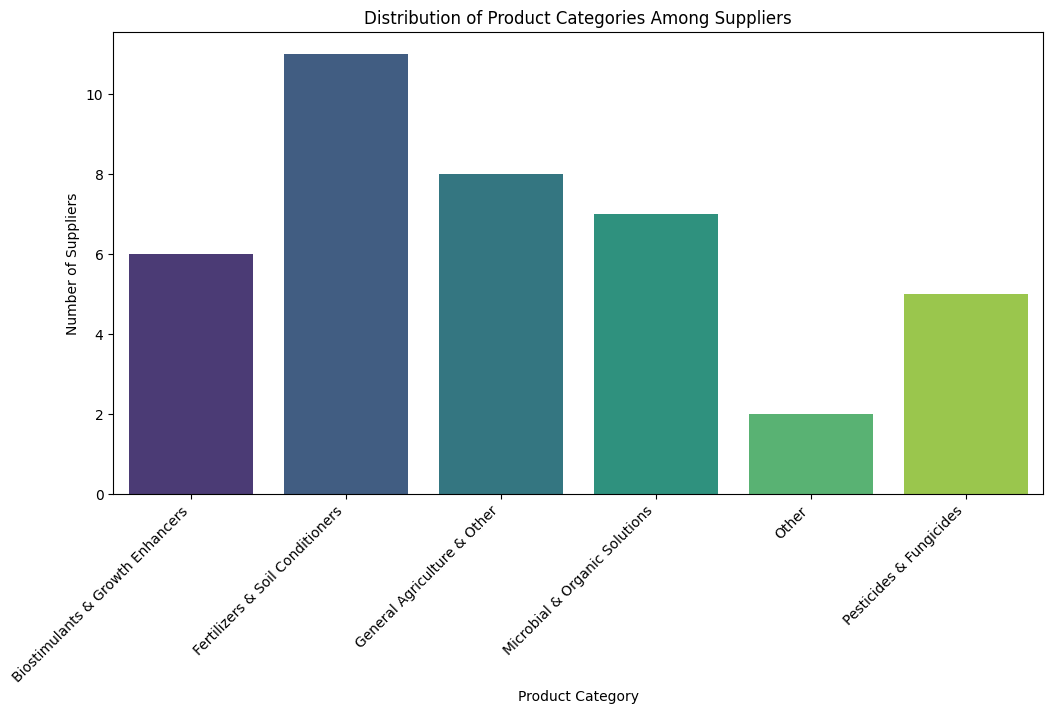

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting only category columns (assuming first columns are non-numeric)
category_columns = [
    "Biostimulants & Growth Enhancers",
    "Fertilizers & Soil Conditioners",
    "General Agriculture & Other",
    "Microbial & Organic Solutions",
    "Other",
    "Pesticides & Fungicides"
]

# Summing up the number of suppliers in each category
category_counts = df_fournisseurs[category_columns].sum()

# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Number of Suppliers")
plt.title("Distribution of Product Categories Among Suppliers")

# Display the plot
plt.show()